# Analysis_of_financial_performance

# Modules

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import os, re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.20f}'.format)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import re
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats
from scipy.stats import ttest_ind


from datetime import datetime, timedelta

from tqdm import tqdm
import numpy as np
import random
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller, coint, acf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [16]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
cd /content/drive/MyDrive/MSC_YORK/PROJECT/

/content/drive/MyDrive/MSC_YORK/PROJECT


In [74]:
pwd

'/content/drive/MyDrive/MSC_YORK/PROJECT'

# Pre-processing

## Collect metrics

In [19]:
back_testing_results = pd.read_csv("BACKTESTING/back_testing_results.csv")
back_testing_results = back_testing_results.loc[(back_testing_results['ai_algo-annualized_volatility'] >0) & (back_testing_results['standard_algo-annualized_volatility'] > 0.00000000000000000000)]
back_testing_results.head(10)


,coin1,coin2,window_d,rmse,mse,mae,r2,mape,ai_algo-cumulative_return,ai_algo-annualized_return,ai_algo-annualized_volatility,ai_algo-sharpe_ratio,ai_algo-raw_pnl,ai_algo-net_pnl,ai_algo-fees,ai_algo-ratio_fees,ai_algo-num_trades,ai_algo-avg_trade_duration,ai_algo-win_ratio,ai_algo-max_drawdown,standard_algo-cumulative_return,standard_algo-annualized_return,standard_algo-annualized_volatility,standard_algo-sharpe_ratio,standard_algo-raw_pnl,standard_algo-net_pnl,standard_algo-fees,standard_algo-ratio_fees,standard_algo-num_trades,standard_algo-avg_trade_duration,standard_algo-win_ratio,standard_algo-max_drawdown
6,BTCUSDT,LUNCUSDT,1.75000000000000000000,0.05846912171619370047,0.00341863819426300010,0.05589028690771070257,-19.30221836640498267457,0.63632677028178885603,0.00184837852373840000,6273.46337452031093562255,0.25735843042658651525,24376.32745941796747501940,23.69033710985267759952,18.48378523738266565601,-5.20655187247001016715,21.98000000000000042633,6,22.19999999999999928946,0.83333333333333337034,0.00000000000000000000,0.00413275429933759961,12.97267949940342468551,0.21394942670837741039,60.58758697714169727533,44.82369907520610752272,41.32754299337508285817,-3.49615608183103265816,7.79999999999999982236,3,274.00000000000000000000,1.00000000000000000000,0.00000000000000000000
7,BTCUSDT,LUNCUSDT,2.00000000000000000000,0.05846912171619370047,0.00341863819426300010,0.05589028690771070257,-19.30221836640498267457,0.63632677028178885603,0.00113600516070739991,18.76133238291395244346,0.22509927391814840703,83.30250052131395932520,13.68674206074185129012,11.36005160707300021272,-2.32669045366885329784,17.00000000000000000000,3,100.00000000000000000000,0.66666666666666662966,0.00000000000000000000,0.00285771322727969984,18.49276836290174941269,0.19551643671669768909,94.53306675020463956116,30.89181795863790114254,28.57713227280027012966,-2.31468568583762879243,7.49000000000000021316,2,252.50000000000000000000,1.00000000000000000000,0.00000000000000000000
20,ETHUSDT,XRPUSDT,0.25000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00086452405063879999,-0.17473719254749028873,0.16437860492985451044,-1.12385180922008309778,1.79839870168588311650,-8.64524050639065322343,-10.44363920807653656198,580.72000000000002728484,9,295.87500000000000000000,0.22222222222222220989,-0.00086452405063879999,0.00424619092866440010,6.21460444699128888857,0.20096080565839918863,30.87469930598362921614,62.02243697753340967438,42.46190928664401553760,-19.56052769088939058406,31.53999999999999914735,16,75.13333333333333996507,0.87500000000000000000,-0.00020026482494879999
21,ETHUSDT,XRPUSDT,0.50000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00060252991815039998,-0.14014704340037290042,0.06773758376565269801,-2.21659874848543081427,2.64411073183570000111,-6.02529918150993015757,-8.66940991334563015869,327.87999999999999545253,8,299.71428571428572240620,0.25000000000000000000,-0.00064523349871209998,0.00345127308935519982,10.70967948805100355969,0.21296846685063688942,50.24067481105128507579,43.64948209240090903904,34.51273089355064627171,-9.13675119885026454369,20.92999999999999971578,8,105.14285714285713879690,0.87500000000000000000,0.00000000000000000000
22,ETHUSDT,XRPUSDT,0.75000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00035570775785820000,-0.08685595605524440432,0.05116930986334739667,-1.89285249916224351807,4.27134505021911969891,-3.55707757858397410899,-7.82842262880309380790,183.28000000000000113687,7,343.00000000000000000000,0.14285714285714279370,-0.00035570775785820000,0.00215030059778230018,2.75671850734299539454,0.19449179862689661147,14.12254155051629211926,27.42663591742660500472,21.50300597782720757323,-5.92362993959939743149,21.60000000000000142109,6,170.59999999999999431

In [20]:
back_testing_results[['ai_algo-annualized_return','standard_algo-annualized_return']].tail()

,ai_algo-annualized_return,standard_algo-annualized_return
511,4.21423288567311882247,2.40189999659240260854
520,3.41261087586455591492,3.19358725330604453774
521,917.44434826739859545341,4.85905375232248903927
522,1714.75602999851275853871,2.50711784366592471684
523,991.69967460227883293555,4.42149982743491243298


## Final dataset

In [21]:
back_testing_results['ai_algo-max_drawdown'] = abs(back_testing_results['ai_algo-max_drawdown'])
back_testing_results['standard_algo-max_drawdown'] = abs(back_testing_results['standard_algo-max_drawdown'])

In [22]:
back_testing_results['ai_algo-fees'] = abs(back_testing_results['ai_algo-fees'])
back_testing_results['standard_algo-fees'] = abs(back_testing_results['standard_algo-fees'])

In [23]:
back_testing_results['ai_algo-num_trades_is_positive'] = back_testing_results['ai_algo-num_trades'] > 0

In [24]:
back_testing_results.head()

,coin1,coin2,window_d,rmse,mse,mae,r2,mape,ai_algo-cumulative_return,ai_algo-annualized_return,ai_algo-annualized_volatility,ai_algo-sharpe_ratio,ai_algo-raw_pnl,ai_algo-net_pnl,ai_algo-fees,ai_algo-ratio_fees,ai_algo-num_trades,ai_algo-avg_trade_duration,ai_algo-win_ratio,ai_algo-max_drawdown,standard_algo-cumulative_return,standard_algo-annualized_return,standard_algo-annualized_volatility,standard_algo-sharpe_ratio,standard_algo-raw_pnl,standard_algo-net_pnl,standard_algo-fees,standard_algo-ratio_fees,standard_algo-num_trades,standard_algo-avg_trade_duration,standard_algo-win_ratio,standard_algo-max_drawdown,ai_algo-num_trades_is_positive
6,BTCUSDT,LUNCUSDT,1.75000000000000000000,0.05846912171619370047,0.00341863819426300010,0.05589028690771070257,-19.30221836640498267457,0.63632677028178885603,0.00184837852373840000,6273.46337452031093562255,0.25735843042658651525,24376.32745941796747501940,23.69033710985267759952,18.48378523738266565601,5.20655187247001016715,21.98000000000000042633,6,22.19999999999999928946,0.83333333333333337034,0.00000000000000000000,0.00413275429933759961,12.97267949940342468551,0.21394942670837741039,60.58758697714169727533,44.82369907520610752272,41.32754299337508285817,3.49615608183103265816,7.79999999999999982236,3,274.00000000000000000000,1.00000000000000000000,0.00000000000000000000,True
7,BTCUSDT,LUNCUSDT,2.00000000000000000000,0.05846912171619370047,0.00341863819426300010,0.05589028690771070257,-19.30221836640498267457,0.63632677028178885603,0.00113600516070739991,18.76133238291395244346,0.22509927391814840703,83.30250052131395932520,13.68674206074185129012,11.36005160707300021272,2.32669045366885329784,17.00000000000000000000,3,100.00000000000000000000,0.66666666666666662966,0.00000000000000000000,0.00285771322727969984,18.49276836290174941269,0.19551643671669768909,94.53306675020463956116,30.89181795863790114254,28.57713227280027012966,2.31468568583762879243,7.49000000000000021316,2,252.50000000000000000000,1.00000000000000000000,0.00000000000000000000,True
20,ETHUSDT,XRPUSDT,0.25000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00086452405063879999,-0.17473719254749028873,0.16437860492985451044,-1.12385180922008309778,1.79839870168588311650,-8.64524050639065322343,10.44363920807653656198,580.72000000000002728484,9,295.87500000000000000000,0.22222222222222220989,0.00086452405063879999,0.00424619092866440010,6.21460444699128888857,0.20096080565839918863,30.87469930598362921614,62.02243697753340967438,42.46190928664401553760,19.56052769088939058406,31.53999999999999914735,16,75.13333333333333996507,0.87500000000000000000,0.00020026482494879999,True
21,ETHUSDT,XRPUSDT,0.50000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00060252991815039998,-0.14014704340037290042,0.06773758376565269801,-2.21659874848543081427,2.64411073183570000111,-6.02529918150993015757,8.66940991334563015869,327.87999999999999545253,8,299.71428571428572240620,0.25000000000000000000,0.00064523349871209998,0.00345127308935519982,10.70967948805100355969,0.21296846685063688942,50.24067481105128507579,43.64948209240090903904,34.51273089355064627171,9.13675119885026454369,20.92999999999999971578,8,105.14285714285713879690,0.87500000000000000000,0.00000000000000000000,True
22,ETHUSDT,XRPUSDT,0.75000000000000000000,0.01241472234872030046,0.00015412533099579999,0.01165264462001480011,-1.68104688011669800574,9.32407475009270036992,-0.00035570775785820000,-0.08685595605524440432,0.05116930986334739667,-1.89285249916224351807,4.27134505021911969891,-3.55707757858397410899,7.82842262880309380790,183.28000000000000113687,7,343.00000000000000000000,0.14285714285714279370,0.00035570775785820000,0.00215030059778230018,2.75671850734299539454,0.19449179862689661147,14.12254155051629211926,27.42663591742660500472,21.50300597782720757323,5.92362993959939743149,21.6000000

In [25]:
columns = [col for col in back_testing_results.columns if ('rmse' not in col) and ('mse' not in col) and ('mae' not in col) and ('r2' not in col) and ('mape' not in col)]
columns
back_testing_results = back_testing_results[columns]

['coin1',
 'coin2',
 'window_d',
 'ai_algo-cumulative_return',
 'ai_algo-annualized_return',
 'ai_algo-annualized_volatility',
 'ai_algo-sharpe_ratio',
 'ai_algo-raw_pnl',
 'ai_algo-net_pnl',
 'ai_algo-fees',
 'ai_algo-ratio_fees',
 'ai_algo-num_trades',
 'ai_algo-avg_trade_duration',
 'ai_algo-win_ratio',
 'ai_algo-max_drawdown',
 'standard_algo-cumulative_return',
 'standard_algo-annualized_return',
 'standard_algo-annualized_volatility',
 'standard_algo-sharpe_ratio',
 'standard_algo-raw_pnl',
 'standard_algo-net_pnl',
 'standard_algo-fees',
 'standard_algo-ratio_fees',
 'standard_algo-num_trades',
 'standard_algo-avg_trade_duration',
 'standard_algo-win_ratio',
 'standard_algo-max_drawdown',
 'ai_algo-num_trades_is_positive']

In [26]:
scope_mae = pd.read_csv("EXPLORATIVE_DATA_ANALYSIS/scope.csv")
scope_mae
scope = scope_mae[:4].query("coin1 !='XRPUSDT'")

,coin1,coin2,in_sample_start_date,in_sample_end_date,out_of_sample_end_date,rmse,mse,mae,r2,mape,adf_p_value,correlation,correlation_p_value,hurst,half_life
0,LINKUSDT,ATOMUSDT,2023-01-01,2023-01-19,2023-01-23,0.00377789822154810020,0.00001427251497237675,0.00278796294405520007,0.78660744013019268106,0.62726020446510855066,0.01643823908077890125,0.89542909954231908465,0.00000000000000000000,0.38778757562937349324,88.00000000000000000000
1,XRPUSDT,TRXUSDT,2023-01-01,2023-01-19,2023-01-23,0.00727230121133210037,0.00005288636490834242,0.00579934113801050012,-1.54162186413696256082,0.14892801589451121203,0.03536386793756660096,0.73377545640566055329,0.00000000000000000000,0.30680807456923320231,63.00000000000000000000
2,DOTUSDT,JASMYUSDT,2023-01-01,2023-01-19,2023-01-23,0.00680140346440280021,0.00004625908908559081,0.00590557901733909998,0.09692495246645309315,0.18023014601456718853,0.04611042612766780291,0.94657131409913597420,0.00000000000000000000,0.30857846822193740755,46.00000000000000000000
3,LTCUSDT,LUNCUSDT,2023-01-01,2023-01-19,2023-01-23,0.00699531453825659975,0.00004893442548914428,0.00618570471245909973,0.72929932895663296399,3.54179006430946108352,0.01929844756080839954,0.72028623123165935738,0.00000000000000000000,0.38877388843918708750,128.00000000000000000000
4,NEARUSDT,LUNCUSDT,2023-01-01,2023-01-19,2023-01-23,0.01595175568639129945,0.00025445850947829998,0.00999179300343100082,0.65995560916060003187,0.29298718444456589571,0.00245619324182399981,0.83420586661110740501,0.00000000000000000000,0.42027057265028472388,75.00000000000000000000
5,XRPUSDT,LTCUSDT,2023-01-01,2023-01-19,2023-01-23,0.01249812662034649989,0.00015620316901820001,0.01081115915695799942,-4.39036712652736493823,0.37612186455081569880,0.00195514565616140010,0.85134514815207418259,0.00000000000000000000,0.39687739763585061503,75.00000000000000000000
6,SOLUSDT,DOTUSDT,2023-01-01,2023-01-19,2023-01-23,0.01407048282990290035,0.00019797848706650000,0.01138454403270530019,0.67450422606609428122,0.83500868372014414032,0.00382617341976170021,0.88242447904007448312,0.00000000000000000000,0.35284163359356629508,80.00000000000000000000
7,ADAUSDT,LUNCUSDT,2023-01-01,2023-01-19,2023-01-23,0.01587329506744960053,0.00025196149629830002,0.01172128121058580059,0.36910458622790298655,4.93419540341765383573,0.00099613424705529991,0.75258003730323497216,0.00000000000000000000,0.41912156321331428543,81.00000000000000000000
8,SANDUSDT,DOTUSDT,2023-01-01,2023-01-19,2023-01-23,0.05784100628374760217,0.00334558200791650008,0.05342309994312310212,-3.06756527148455315768,11.13807644787125639141,0.04935292818458599656,0.76524676863308349617,0.00000000000000000000,0.38279947241990047724,139.00000000000000000000
9,SOLUSDT,SANDUSDT,2023-01-01,2023-01-19,2023-01-23,0.06702013529658899793,0.00449169853517300023,0.06044840516352979753,-13.29991069683165783033,5.09220754881422177363,0.00771395312606659982,0.93053857832192876653,0.00000000000000000000,0.41627654356609672393,177.00000000000000000000


In [27]:
scope

,coin1,coin2,in_sample_start_date,in_sample_end_date,out_of_sample_end_date,rmse,mse,mae,r2,mape,adf_p_value,correlation,correlation_p_value,hurst,half_life
0,LINKUSDT,ATOMUSDT,2023-01-01,2023-01-19,2023-01-23,0.00377789822154810020,0.00001427251497237675,0.00278796294405520007,0.78660744013019268106,0.62726020446510855066,0.01643823908077890125,0.89542909954231908465,0.00000000000000000000,0.38778757562937349324,88.00000000000000000000
2,DOTUSDT,JASMYUSDT,2023-01-01,2023-01-19,2023-01-23,0.00680140346440280021,0.00004625908908559081,0.00590557901733909998,0.09692495246645309315,0.18023014601456718853,0.04611042612766780291,0.94657131409913597420,0.00000000000000000000,0.30857846822193740755,46.00000000000000000000
3,LTCUSDT,LUNCUSDT,2023-01-01,2023-01-19,2023-01-23,0.00699531453825659975,0.00004893442548914428,0.00618570471245909973,0.72929932895663296399,3.54179006430946108352,0.01929844756080839954,0.72028623123165935738,0.00000000000000000000,0.38877388843918708750,128.00000000000000000000


In [28]:
back_testing_results = back_testing_results.merge(scope, on=['coin1', 'coin2',], how='inner')

# Functions

In [29]:
def describe(df, ai_col, standard_col):
  """
    Generate descriptive statistics for AI and standard model's metrics.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the metrics.
    ai_col : str
        The name of the column with AI model's metrics.
    standard_col : str
        The name of the column with standard model's metrics.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame with descriptive statistics.
  """
  desc_ai = df[ai_col].describe().to_frame().transpose()
  desc_std = df[standard_col].describe().to_frame().transpose()

  comparison_table = pd.concat([desc_ai, desc_std], axis=0)
  comparison_table.index = [ai_col, standard_col]

  return comparison_table

def find_max_rejection_threshold(df, col,pace=0.01):
    """
    Find the maximum threshold where the null hypothesis (H0) can be rejected.

    This function starts with a threshold of 0 and increases it iteratively until the null hypothesis
    can no longer be rejected. It returns the last threshold where H0 was rejected.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    col : str
        The name of the column to test.

    Returns:
    -------
    max_threshold : float
        The maximum threshold where the null hypothesis can still be rejected.
    """
    import scipy.stats as stats

    # Significance level
    alpha = 0.05

    # Initial threshold
    threshold = 0
    max_threshold = 0

    # Check normality of the data
    _, p_value_col1 = stats.shapiro(df[col])
    print(f'P-value for normality test on {col}: {p_value_col1}')

    normally_distributed = p_value_col1 > alpha

    # Continue increasing the threshold until the null hypothesis is not rejected
    while True:
        if normally_distributed:
            # Perform one-sample t-test for normally distributed data
            result = stats.ttest_1samp(a=df[col], popmean=threshold, alternative='greater')
            p_value = result.pvalue
        else:
            # Perform Wilcoxon signed-rank test for non-normally distributed data
            _, p_value = stats.wilcoxon(df[col] - threshold, alternative='greater')

        if p_value < alpha:
            max_threshold = threshold
        else:
            break

        # Increase the threshold slightly
        threshold += pace

    print(f"The maximum threshold where the null hypothesis is rejected: {max_threshold}")
    return max_threshold



def t_test(df,col,threshold):
  """
    Perform a one-sample t-test to compare the mean or median of a column to a threshold.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data.
    col : str
        The name of the column to test.
    threshold : float
        The threshold to compare against.
  """
  import scipy.stats as stats
  alpha = 0.05

  result_df = pd.DataFrame([])
  result_df['col'] = [col]
  result_df['threshold'] = [threshold]
  result_df['normality_test_p_value_col'] = [None]
  result_df['is_normal'] = [None]
  result_df['t_stat'] = [None]
  result_df['p_value_ttest'] = [None]
  result_df['wilcoxon_stat'] = [None]
  result_df['p_value_wilcoxon']  = [None]

  # Check normality
  _, p_value_col = stats.shapiro(df[col])
  print(f'P-value for normality test on {col}: {p_value_col}')
  result_df['normality_test_p_value_col'] = [p_value_col]


  if p_value_col > alpha:
    print('The distribution is normally distributed.')
    normal = 'yes'

    # Perform one-sample t-test
    result = stats.ttest_1samp(a=df[col], popmean=threshold, alternative='greater')

    # Print the results
    print(f"t-statistic: {result.statistic:.2f}")
    print(f"p-value: {result.pvalue:.3f}")

    result_df['t_stat'] = [result.statistic]
    result_df['p_value_ttest'] = [result.pvalue]

    # Interpretation
    alpha = 0.05  # Significance level
    if result.pvalue < alpha:
      print(f'Reject the null hypothesis: The mean is significantly greater than {threshold}.')
      decision = 'Reject H0'
    else:
      print(f'Fail to reject the null hypothesis: The mean is not significantly greater than {threshold}.')
      decision = 'Fail to reject H0'
  else:
    print('The series is not normally distributed.')
    normal = 'no'

    # Perform the Wilcoxon signed-rank test
    wilcoxon_stat, p_value_wilcoxon = stats.wilcoxon(df[col] - threshold, alternative='greater')

    print(f'Wilcoxon statistic: {wilcoxon_stat}')
    print(f'P-value for the Wilcoxon signed-rank test: {p_value_wilcoxon}')
    result_df['wilcoxon_stat'] = [wilcoxon_stat]
    result_df['p_value_wilcoxon'] = [p_value_wilcoxon]

    # Interpretation
    if p_value_wilcoxon < alpha:
      print(f'Reject the null hypothesis: The median is significantly greater than {threshold}.')
      decision = 'Reject H0'
    else:
      print(f'Fail to reject the null hypothesis: The median is not significantly greater than {threshold}.')
      decision = 'Fail to reject H0'

  result_df['is_normal'] = [normal]
  result_df['decision'] = [decision]
  return result_df



def two_sample_t_test(df, col1, col2):
    """
    Perform a two-sample t-test to compare AI and standard model's metrics.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the metrics.
    ai_col : str
        The name of the column with AI model's metrics.
    standard_col : str
        The name of the column with standard model's metrics.
    """
    from scipy import stats
    alpha = 0.05
    result_df = pd.DataFrame([])
    result_df['col1'] = [col1]
    result_df['col2'] = [col2]
    result_df['normality_test_p_value_col1'] = [None]
    result_df['normality_test_p_value_col2'] = [None]
    result_df['is_normal'] = [None]
    result_df['p_value_equal_variance_levene_test'] = [None]
    result_df['t_stat'] = [None]
    result_df['p_value_ttest'] = [None]
    result_df['u_stat'] = [None]
    result_df['p_value_mannwhitney'] = [None]


    # Check normality
    _, p_value_col1 = stats.shapiro(df[col1])
    _, p_value_col2 = stats.shapiro(df[col2])

    print(f'P-value for normality test on {col1}: {p_value_col1}')
    print(f'P-value for normality test on {col2}: {p_value_col2}')

    result_df['normality_test_p_value_col1'] = [p_value_col1]
    result_df['normality_test_p_value_col2'] = [p_value_col2]

    if p_value_col1 > alpha and p_value_col2 > alpha:
        print('Both groups are normally distributed.')
        normal = 'yes'

        # Perform Levene's test for equal variances
        _, p_value_var = stats.levene(df[col1], df[col2])
        print(f'P-value for equal variance test: {p_value_var}')
        result_df['p_value_equal_variance_levene_test'] = [p_value_var]

        # Perform the one-tailed two-sample t-test
        if p_value_var > alpha:  # Variances are equal
            t_stat, p_value_ttest = stats.ttest_ind(df[col1], df[col2], equal_var=True, alternative='greater')
        else:  # Variances are not equal
            t_stat, p_value_ttest = stats.ttest_ind(df[col1], df[col2], equal_var=False, alternative='greater')

        print(f'T-statistic: {t_stat}')
        print(f'P-value for the t-test: {p_value_ttest}')
        result_df['t_stat'] = [t_stat]
        result_df['p_value_ttest'] = [p_value_ttest]

        # Interpretation
        if p_value_ttest < alpha:
            print(f'Reject the null hypothesis: The mean of {col1} is significantly greater than the mean of {col2}.')
            decision = 'Reject H0'
        else:
            print(f'Fail to reject the null hypothesis: The mean of {col1} is not significantly greater than the mean of {col2}.')
            decision = 'Fail to reject H0'

    else:
        print('At least one of the groups is not normally distributed.')
        normal = 'no'

        # Perform the Mann-Whitney U test
        u_stat, p_value_mannwhitney = stats.mannwhitneyu(df[col1], df[col2], alternative='greater')

        print(f'U-statistic: {u_stat}')
        print(f'P-value for the Mann-Whitney U test: {p_value_mannwhitney}')
        result_df['u_stat'] = [u_stat]
        result_df['p_value_mannwhitney'] = [p_value_mannwhitney]

        # Interpretation
        if p_value_mannwhitney < alpha:
            print(f'Reject the null hypothesis: The median of {col1} is significantly greater than the median of {col2}.')
            decision = 'Reject H0'
        else:
            print(f'Fail to reject the null hypothesis: The median of {col1} is not significantly greater than the median of {col2}.')
            decision = 'Fail to reject H0'


    result_df['is_normal'] = [normal]
    result_df['decision'] = [decision]
    return result_df


def plot_metrics(df, ai_col, standard_col,metrics_name):
  """
    Plot the distribution of AI and standard model's metrics.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the metrics.
    ai_col : str
        The name of the column with AI model's metrics.
    standard_col : str
        The name of the column with standard model's metrics.
    metrics_name : str
        The name of the metrics to plot.
  """
  plt.figure(figsize=(20, 10))
  plt.hist(df[ai_col], bins=range(-100, 105, 5), alpha=0.5, label=ai_col)
  plt.hist(df[standard_col], bins=range(-100, 105, 5), alpha=0.5, label=standard_col)
  plt.axvline(df[ai_col].mean(), color='blue', linestyle='-', linewidth=2, label=f'{ai_col}-Mean')
  plt.axvline(df[ai_col].median(), color='blue', linestyle='--', linewidth=2, label=f'{ai_col}-Median')
  plt.axvline(df[standard_col].mean(), color='red', linestyle='-', linewidth=2, label=f'{standard_col}-Mean')
  plt.axvline(df[standard_col].median(), color='red', linestyle='--', linewidth=2, label=f'{standard_col}-Median')

  # Set the title and labels
  plt.title(f'Distribution of {metrics_name}')
  plt.xlabel(metrics_name)
  plt.ylabel('Frequency')

  # Rotate x-axis labels
  plt.xticks(rotation=45)

  # Add a legend
  plt.legend()

  # Display the plot
  plt.tight_layout()
  plt.savefig(f'EXPLORATIVE_DATA_ANALYSIS/{metrics_name}_distribution_plot.png')

  # plt.show()



# Set empty df

In [30]:
all_stats = pd.DataFrame()
two_samples_result_df = pd.DataFrame()
one_sample_result_df = pd.DataFrame()

# Sharpe ratio

In [31]:
back_testing_results['ai_algo-sharpe_ratio'] = back_testing_results['ai_algo-sharpe_ratio'].astype('float64')

In [32]:
back_testing_results.coin1.value_counts()

,count
coin1,
DOTUSDT,11
LINKUSDT,8
LTCUSDT,7


In [33]:
stats = describe(back_testing_results,'ai_algo-sharpe_ratio', 'standard_algo-sharpe_ratio')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)

,count,mean,std,min,25%,50%,75%,max
ai_algo-sharpe_ratio,26.00000000000000000000,43.62205312670349144355,91.31844610913790916129,-1.32960126554331203863,4.59254599910182381706,9.77258809687885232620,37.41247821389751493371,395.38951889858509503028
standard_algo-sharpe_ratio,26.00000000000000000000,32.52959506427424685171,24.06665196855268717968,3.95316466913533393068,9.18163133658439889473,29.87994471240134686241,53.87908887091030862848,75.64214568569192920222


In [34]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results, 'ai_algo-sharpe_ratio', 'standard_algo-sharpe_ratio')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results, 'standard_algo-sharpe_ratio', 'ai_algo-sharpe_ratio')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-sharpe_ratio: 2.6124809132931467e-08
P-value for normality test on standard_algo-sharpe_ratio: 0.008377041535236938
At least one of the groups is not normally distributed.
U-statistic: 234.0
P-value for the Mann-Whitney U test: 0.9720923134986714
Fail to reject the null hypothesis: The median of ai_algo-sharpe_ratio is not significantly greater than the median of standard_algo-sharpe_ratio.
P-value for normality test on standard_algo-sharpe_ratio: 0.008377041535236938
P-value for normality test on ai_algo-sharpe_ratio: 2.6124809132931467e-08
At least one of the groups is not normally distributed.
U-statistic: 442.0
P-value for the Mann-Whitney U test: 0.029101011372598358
Reject the null hypothesis: The median of standard_algo-sharpe_ratio is significantly greater than the median of ai_algo-sharpe_ratio.


In [35]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-sharpe_ratio')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-sharpe_ratio',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-sharpe_ratio')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-sharpe_ratio',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
one_sample_result_df

P-value for normality test on ai_algo-sharpe_ratio: 2.6124809132931467e-08
The maximum threshold where the null hypothesis is rejected: 7.999999999999874
P-value for normality test on ai_algo-sharpe_ratio: 2.6124809132931467e-08
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 7.999999999999874.
####################################
P-value for normality test on standard_algo-sharpe_ratio: 0.008377041535236938
The maximum threshold where the null hypothesis is rejected: 21.320000000000533
P-value for normality test on standard_algo-sharpe_ratio: 0.008377041535236938
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 21.320000000000533.


,col,threshold,normality_test_p_value_col,is_normal,t_stat,p_value_ttest,wilcoxon_stat,p_value_wilcoxon,decision
0,standard_algo-sharpe_ratio,21.32000000000053319127,0.00837704153523693811,no,None,None,241.00000000000000000000,0.04966747760772705078,Reject H0
0,ai_algo-sharpe_ratio,7.99999999999987387866,0.00000002612480913293,no,None,None,241.00000000000000000000,0.04966747760772705078,Reject H0


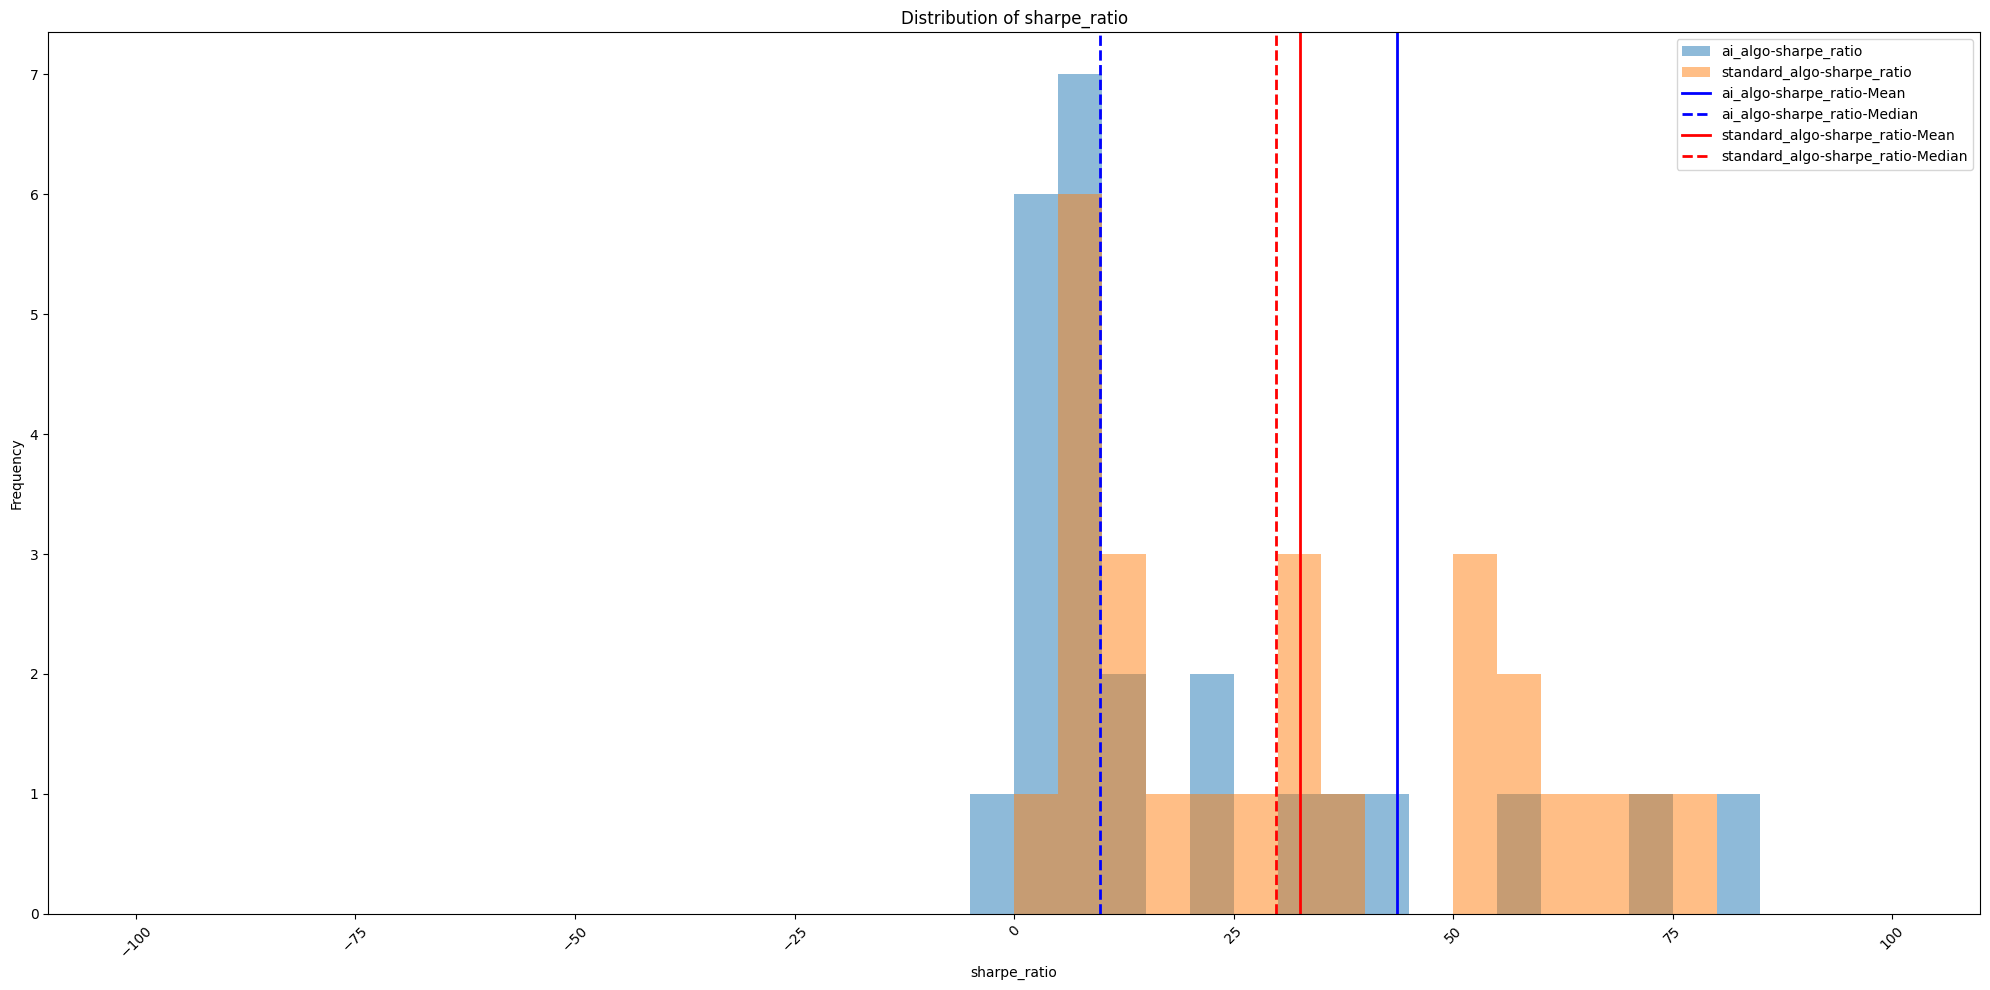

In [36]:
plot_metrics(back_testing_results, 'ai_algo-sharpe_ratio', 'standard_algo-sharpe_ratio','sharpe_ratio')

# Annualized return

In [37]:
stats = describe(back_testing_results,'ai_algo-annualized_return', 'standard_algo-annualized_return')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-annualized_return,26.00000000000000000000,5.17328584182904105404,8.13552693174852770142,-0.15760622402440790935,0.67778794840181444403,1.49640613416357215470,4.62795376555889514947,32.64229057345670526047
standard_algo-annualized_return,26.00000000000000000000,3.85323638000246493363,2.25316601895203305617,1.04173374206158397826,2.09221957668162339417,3.61803706572202310454,4.98792088234051700368,9.09227883233799616391


In [38]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results, 'ai_algo-annualized_return','standard_algo-annualized_return')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results, 'standard_algo-annualized_return','ai_algo-annualized_return')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-annualized_return: 1.2863758559353265e-06
P-value for normality test on standard_algo-annualized_return: 0.06482321662741716
At least one of the groups is not normally distributed.
U-statistic: 238.0
P-value for the Mann-Whitney U test: 0.9670622318453879
Fail to reject the null hypothesis: The median of ai_algo-annualized_return is not significantly greater than the median of standard_algo-annualized_return.
P-value for normality test on standard_algo-annualized_return: 0.06482321662741716
P-value for normality test on ai_algo-annualized_return: 1.2863758559353265e-06
At least one of the groups is not normally distributed.
U-statistic: 438.0
P-value for the Mann-Whitney U test: 0.03430582654833579
Reject the null hypothesis: The median of standard_algo-annualized_return is significantly greater than the median of ai_algo-annualized_return.


In [39]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-annualized_return')
one_sample_result_tmp_df = one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-annualized_return',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-annualized_return')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-annualized_return',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-annualized_return: 1.2863758559353265e-06
The maximum threshold where the null hypothesis is rejected: 1.280000000000001
P-value for normality test on ai_algo-annualized_return: 1.2863758559353265e-06
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 1.280000000000001.
####################################
P-value for normality test on standard_algo-annualized_return: 0.06482321662741716
The maximum threshold where the null hypothesis is rejected: 3.089999999999978
P-value for normality test on standard_algo-annualized_return: 0.06482321662741716
The distribution is normally distributed.
t-statistic: 1.73
p-value: 0.048
Reject the null hypothesis: The mean is significantly greater than 3.089999999999978.


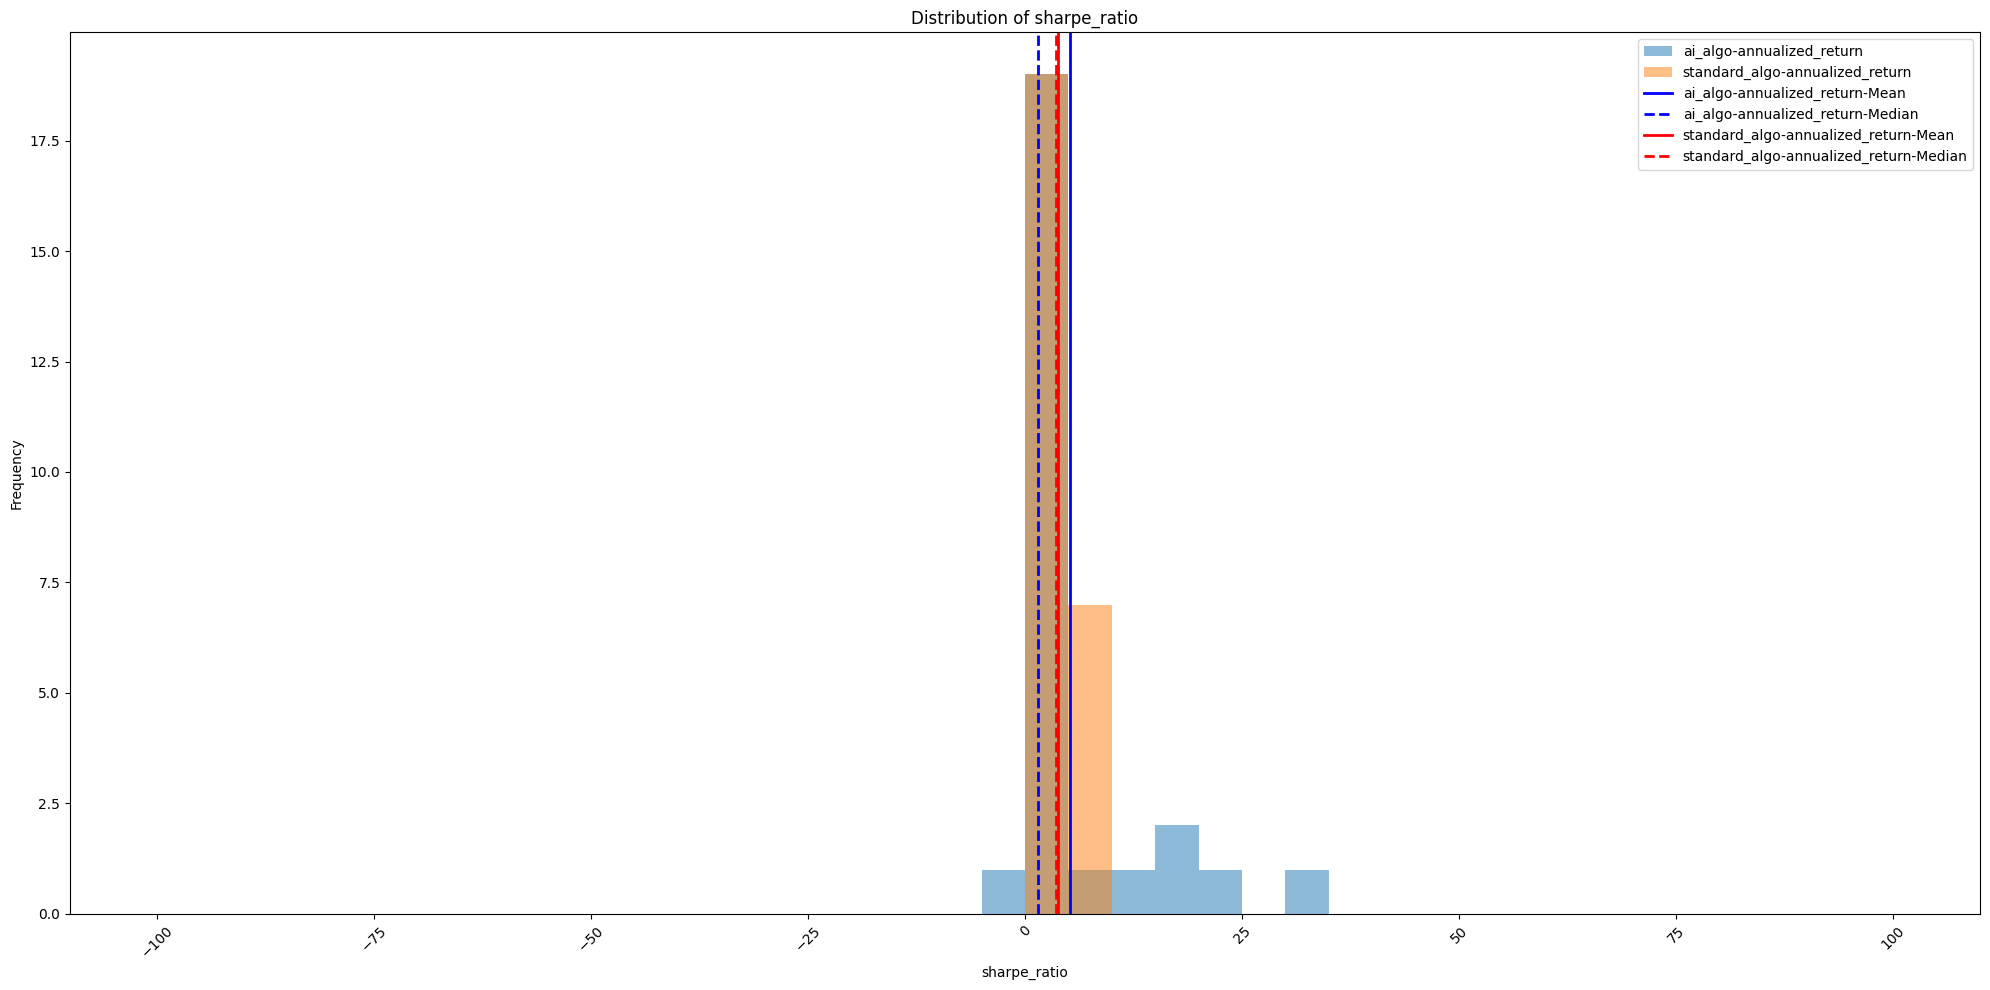

In [40]:
plot_metrics(back_testing_results,  'ai_algo-annualized_return','standard_algo-annualized_return','sharpe_ratio')

# annualised volatility

In [41]:
stats = describe(back_testing_results,'ai_algo-annualized_volatility', 'standard_algo-annualized_volatility')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-annualized_volatility,26.00000000000000000000,0.16406069284347601922,0.05873872174878225216,0.04128058968847499871,0.12505514728742950226,0.15283487929831124363,0.20923684739333389682,0.27136540833845418375
standard_algo-annualized_volatility,26.00000000000000000000,0.16544097090261089544,0.10443961472194784879,0.04312479536312280315,0.09572010780568204757,0.13751553315457409887,0.18576285366914355168,0.44839190697332859115


In [42]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results, 'ai_algo-annualized_volatility','standard_algo-annualized_volatility')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-annualized_volatility','ai_algo-annualized_volatility')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-annualized_volatility: 0.2808184676961993
P-value for normality test on standard_algo-annualized_volatility: 0.0026275419988238567
At least one of the groups is not normally distributed.
U-statistic: 378.0
P-value for the Mann-Whitney U test: 0.23487157652886453
Fail to reject the null hypothesis: The median of ai_algo-annualized_volatility is not significantly greater than the median of standard_algo-annualized_volatility.
P-value for normality test on standard_algo-annualized_volatility: 0.0026275419988238567
P-value for normality test on ai_algo-annualized_volatility: 0.2808184676961993
At least one of the groups is not normally distributed.
U-statistic: 298.0
P-value for the Mann-Whitney U test: 0.770713366556163
Fail to reject the null hypothesis: The median of standard_algo-annualized_volatility is not significantly greater than the median of ai_algo-annualized_volatility.


In [43]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-annualized_volatility', pace = 0.001)
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-annualized_volatility',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-annualized_volatility', pace = 0.001)
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-annualized_volatility',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-annualized_volatility: 0.2808184676961993
The maximum threshold where the null hypothesis is rejected: 0.1440000000000001
P-value for normality test on ai_algo-annualized_volatility: 0.2808184676961993
The distribution is normally distributed.
t-statistic: 1.74
p-value: 0.047
Reject the null hypothesis: The mean is significantly greater than 0.1440000000000001.
####################################
P-value for normality test on standard_algo-annualized_volatility: 0.0026275419988238567
The maximum threshold where the null hypothesis is rejected: 0.1220000000000001
P-value for normality test on standard_algo-annualized_volatility: 0.0026275419988238567
The series is not normally distributed.
Wilcoxon statistic: 242.0
P-value for the Wilcoxon signed-rank test: 0.047036513686180115
Reject the null hypothesis: The median is significantly greater than 0.1220000000000001.


# Net Pnl

In [44]:
stats = describe(back_testing_results, 'ai_algo-net_pnl', 'standard_algo-net_pnl')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-net_pnl,26.00000000000000000000,22.07498408731389005766,13.34365491716761020768,-6.54034412414452503981,15.51113379180590712281,22.27386128742263338154,30.43688612184894282109,48.39823684351693344752
standard_algo-net_pnl,26.00000000000000000000,26.57854801680129952501,8.12619928416808967597,14.70445936912432038923,20.71600012805899027057,23.27088876171267273207,33.36233854673153587100,42.63518296204576785158


In [45]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results, 'ai_algo-net_pnl','standard_algo-net_pnl')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-net_pnl','ai_algo-net_pnl')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-net_pnl: 0.9216630665623418
P-value for normality test on standard_algo-net_pnl: 0.03088724620837891
At least one of the groups is not normally distributed.
U-statistic: 262.0
P-value for the Mann-Whitney U test: 0.91924948969182
Fail to reject the null hypothesis: The median of ai_algo-net_pnl is not significantly greater than the median of standard_algo-net_pnl.
P-value for normality test on standard_algo-net_pnl: 0.03088724620837891
P-value for normality test on ai_algo-net_pnl: 0.9216630665623418
At least one of the groups is not normally distributed.
U-statistic: 414.0
P-value for the Mann-Whitney U test: 0.0835257925853547
Fail to reject the null hypothesis: The median of standard_algo-net_pnl is not significantly greater than the median of ai_algo-net_pnl.


In [46]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-net_pnl')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-net_pnl',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-net_pnl')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-net_pnl',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)


P-value for normality test on ai_algo-net_pnl: 0.9216630665623418
The maximum threshold where the null hypothesis is rejected: 17.59999999999995
P-value for normality test on ai_algo-net_pnl: 0.9216630665623418
The distribution is normally distributed.
t-statistic: 1.71
p-value: 0.050
Reject the null hypothesis: The mean is significantly greater than 17.59999999999995.
####################################
P-value for normality test on standard_algo-net_pnl: 0.03088724620837891
The maximum threshold where the null hypothesis is rejected: 22.790000000000763
P-value for normality test on standard_algo-net_pnl: 0.03088724620837891
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 22.790000000000763.


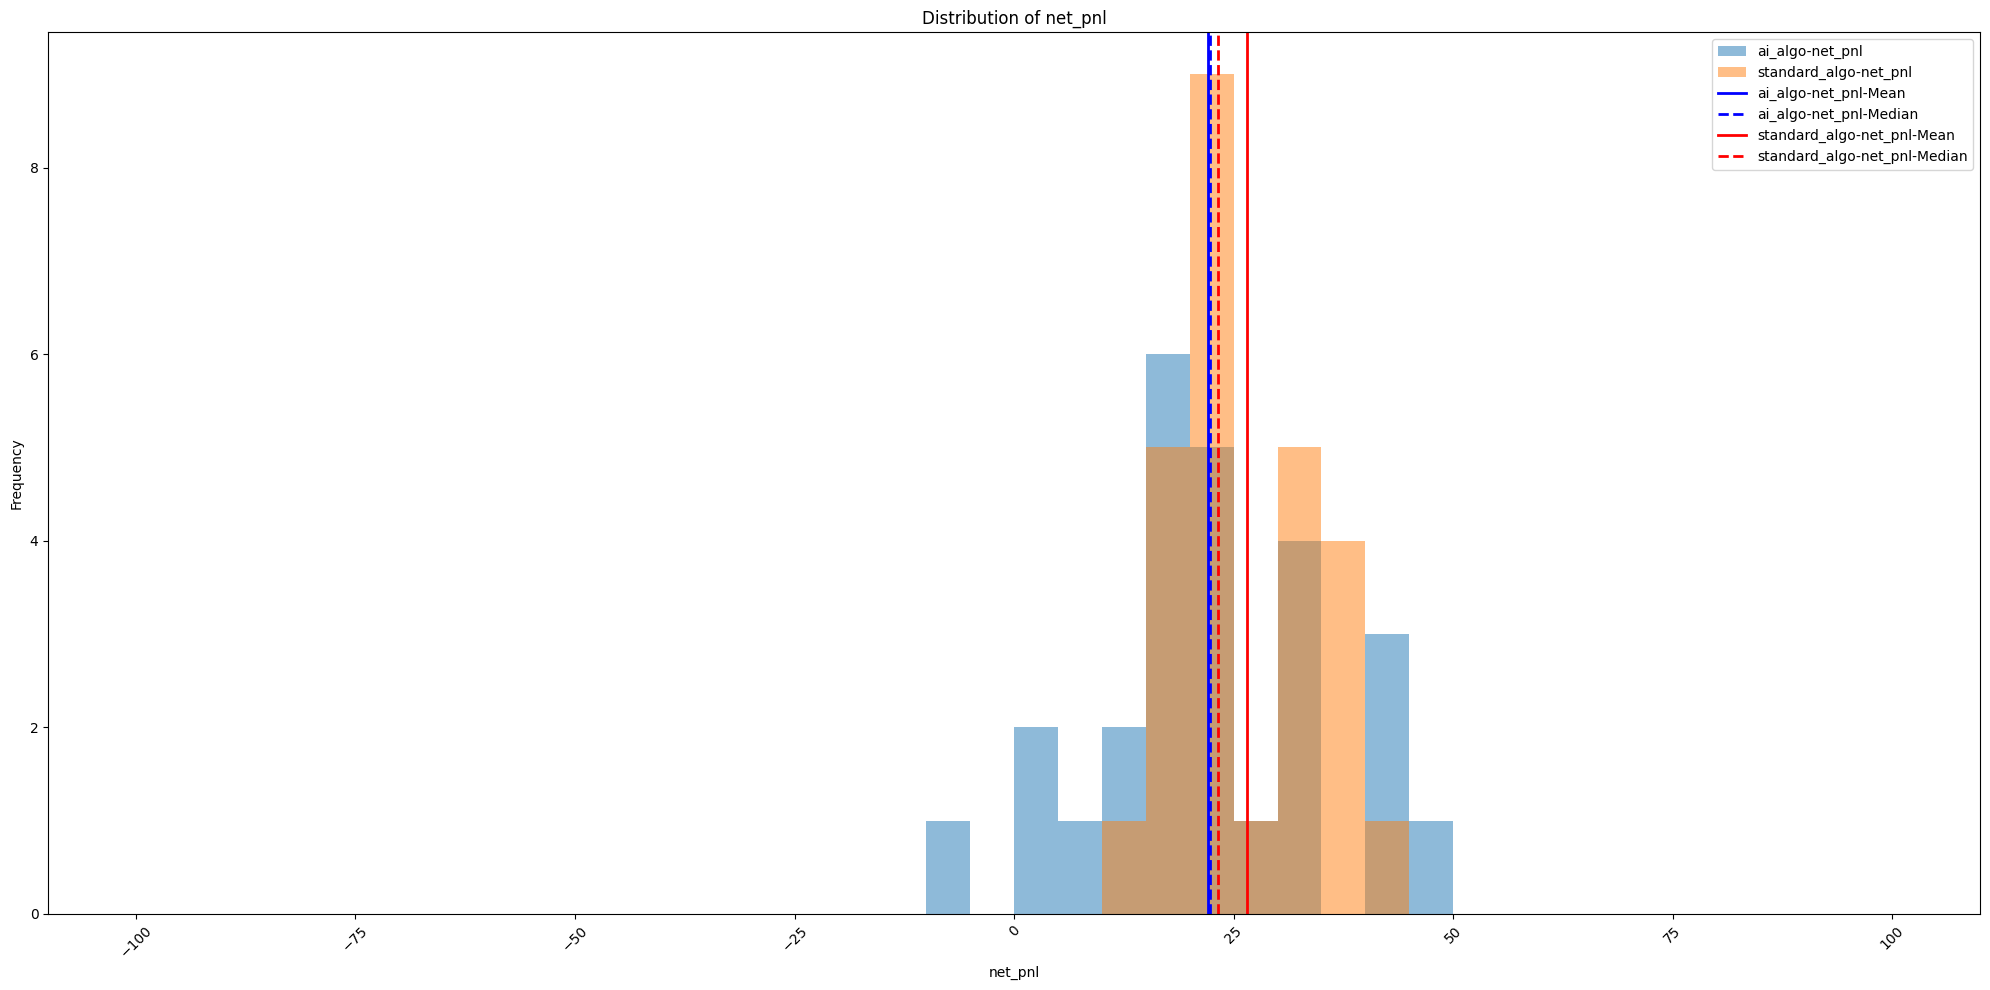

In [47]:
plot_metrics(back_testing_results, 'ai_algo-net_pnl', 'standard_algo-net_pnl','net_pnl')

# Number of trades

In [48]:
stats = describe(back_testing_results, 'ai_algo-num_trades','standard_algo-num_trades')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-num_trades,26.00000000000000000000,9.15384615384615329958,5.06511447209089382682,2.00000000000000000000,5.00000000000000000000,9.00000000000000000000,12.75000000000000000000,21.00000000000000000000
standard_algo-num_trades,26.00000000000000000000,5.34615384615384581224,3.48645731587016749486,2.00000000000000000000,3.00000000000000000000,4.00000000000000000000,7.00000000000000000000,16.00000000000000000000


In [49]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results,  'ai_algo-num_trades','standard_algo-num_trades')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-num_trades', 'ai_algo-num_trades')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-num_trades: 0.3536865359871861
P-value for normality test on standard_algo-num_trades: 0.0003580704742707436
At least one of the groups is not normally distributed.
U-statistic: 492.0
P-value for the Mann-Whitney U test: 0.002331661168819122
Reject the null hypothesis: The median of ai_algo-num_trades is significantly greater than the median of standard_algo-num_trades.
P-value for normality test on standard_algo-num_trades: 0.0003580704742707436
P-value for normality test on ai_algo-num_trades: 0.3536865359871861
At least one of the groups is not normally distributed.
U-statistic: 184.0
P-value for the Mann-Whitney U test: 0.9977991988331518
Fail to reject the null hypothesis: The median of standard_algo-num_trades is not significantly greater than the median of ai_algo-num_trades.


In [50]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-num_trades')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-num_trades',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-num_trades')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-num_trades',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-num_trades: 0.3536865359871861
The maximum threshold where the null hypothesis is rejected: 7.449999999999886
P-value for normality test on ai_algo-num_trades: 0.3536865359871861
The distribution is normally distributed.
t-statistic: 1.72
p-value: 0.049
Reject the null hypothesis: The mean is significantly greater than 7.449999999999886.
####################################
P-value for normality test on standard_algo-num_trades: 0.0003580704742707436
The maximum threshold where the null hypothesis is rejected: 3.4999999999999694
P-value for normality test on standard_algo-num_trades: 0.0003580704742707436
The series is not normally distributed.
Wilcoxon statistic: 270.0
P-value for the Wilcoxon signed-rank test: 0.0075660645961761475
Reject the null hypothesis: The median is significantly greater than 3.4999999999999694.


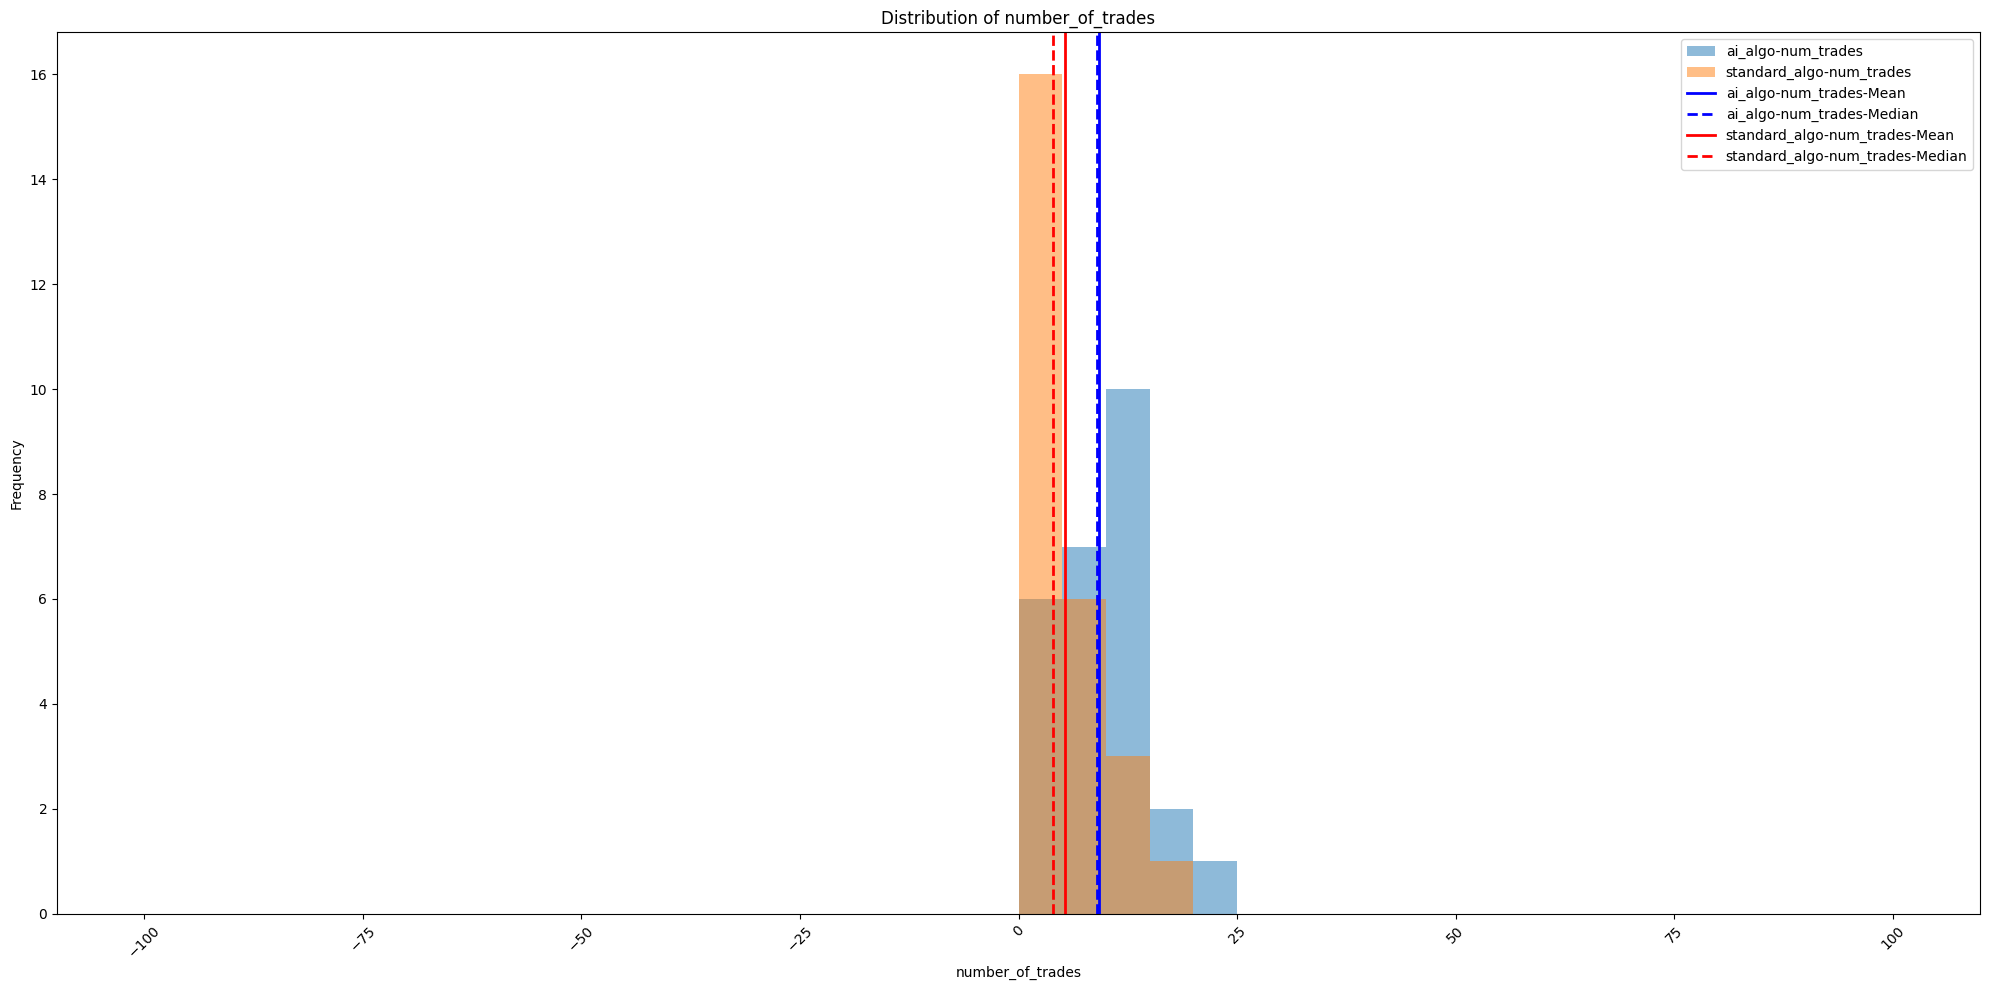

In [51]:
plot_metrics(back_testing_results, 'ai_algo-num_trades','standard_algo-num_trades','number_of_trades')

# Fees

In [52]:
stats = describe(back_testing_results, 'ai_algo-fees', 'standard_algo-fees')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-fees,26.00000000000000000000,7.09974054778475149874,3.59273244089176868599,1.52019703405868922275,4.82677123808035446473,7.27315032115173742966,9.22085024955972443195,13.93312962098207563599
standard_algo-fees,26.00000000000000000000,4.34778089285846736090,2.87839941688247469287,1.47012094934357340215,1.97806623684710825017,3.42133850404377426457,5.75329451224823884559,11.18761919111106983848


In [53]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results,  'ai_algo-fees','standard_algo-fees')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-fees', 'ai_algo-fees')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-fees: 0.33828680541472306
P-value for normality test on standard_algo-fees: 0.0029749692513460282
At least one of the groups is not normally distributed.
U-statistic: 489.0
P-value for the Mann-Whitney U test: 0.0029406292709206
Reject the null hypothesis: The median of ai_algo-fees is significantly greater than the median of standard_algo-fees.
P-value for normality test on standard_algo-fees: 0.0029749692513460282
P-value for normality test on ai_algo-fees: 0.33828680541472306
At least one of the groups is not normally distributed.
U-statistic: 187.0
P-value for the Mann-Whitney U test: 0.9972197377854433
Fail to reject the null hypothesis: The median of standard_algo-fees is not significantly greater than the median of ai_algo-fees.


In [54]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-fees')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-fees',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-fees')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-fees',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)


P-value for normality test on ai_algo-fees: 0.33828680541472306
The maximum threshold where the null hypothesis is rejected: 5.889999999999919
P-value for normality test on ai_algo-fees: 0.33828680541472306
The distribution is normally distributed.
t-statistic: 1.72
p-value: 0.049
Reject the null hypothesis: The mean is significantly greater than 5.889999999999919.
####################################
P-value for normality test on standard_algo-fees: 0.0029749692513460282
The maximum threshold where the null hypothesis is rejected: 2.9899999999999802
P-value for normality test on standard_algo-fees: 0.0029749692513460282
The series is not normally distributed.
Wilcoxon statistic: 242.0
P-value for the Wilcoxon signed-rank test: 0.047036513686180115
Reject the null hypothesis: The median is significantly greater than 2.9899999999999802.


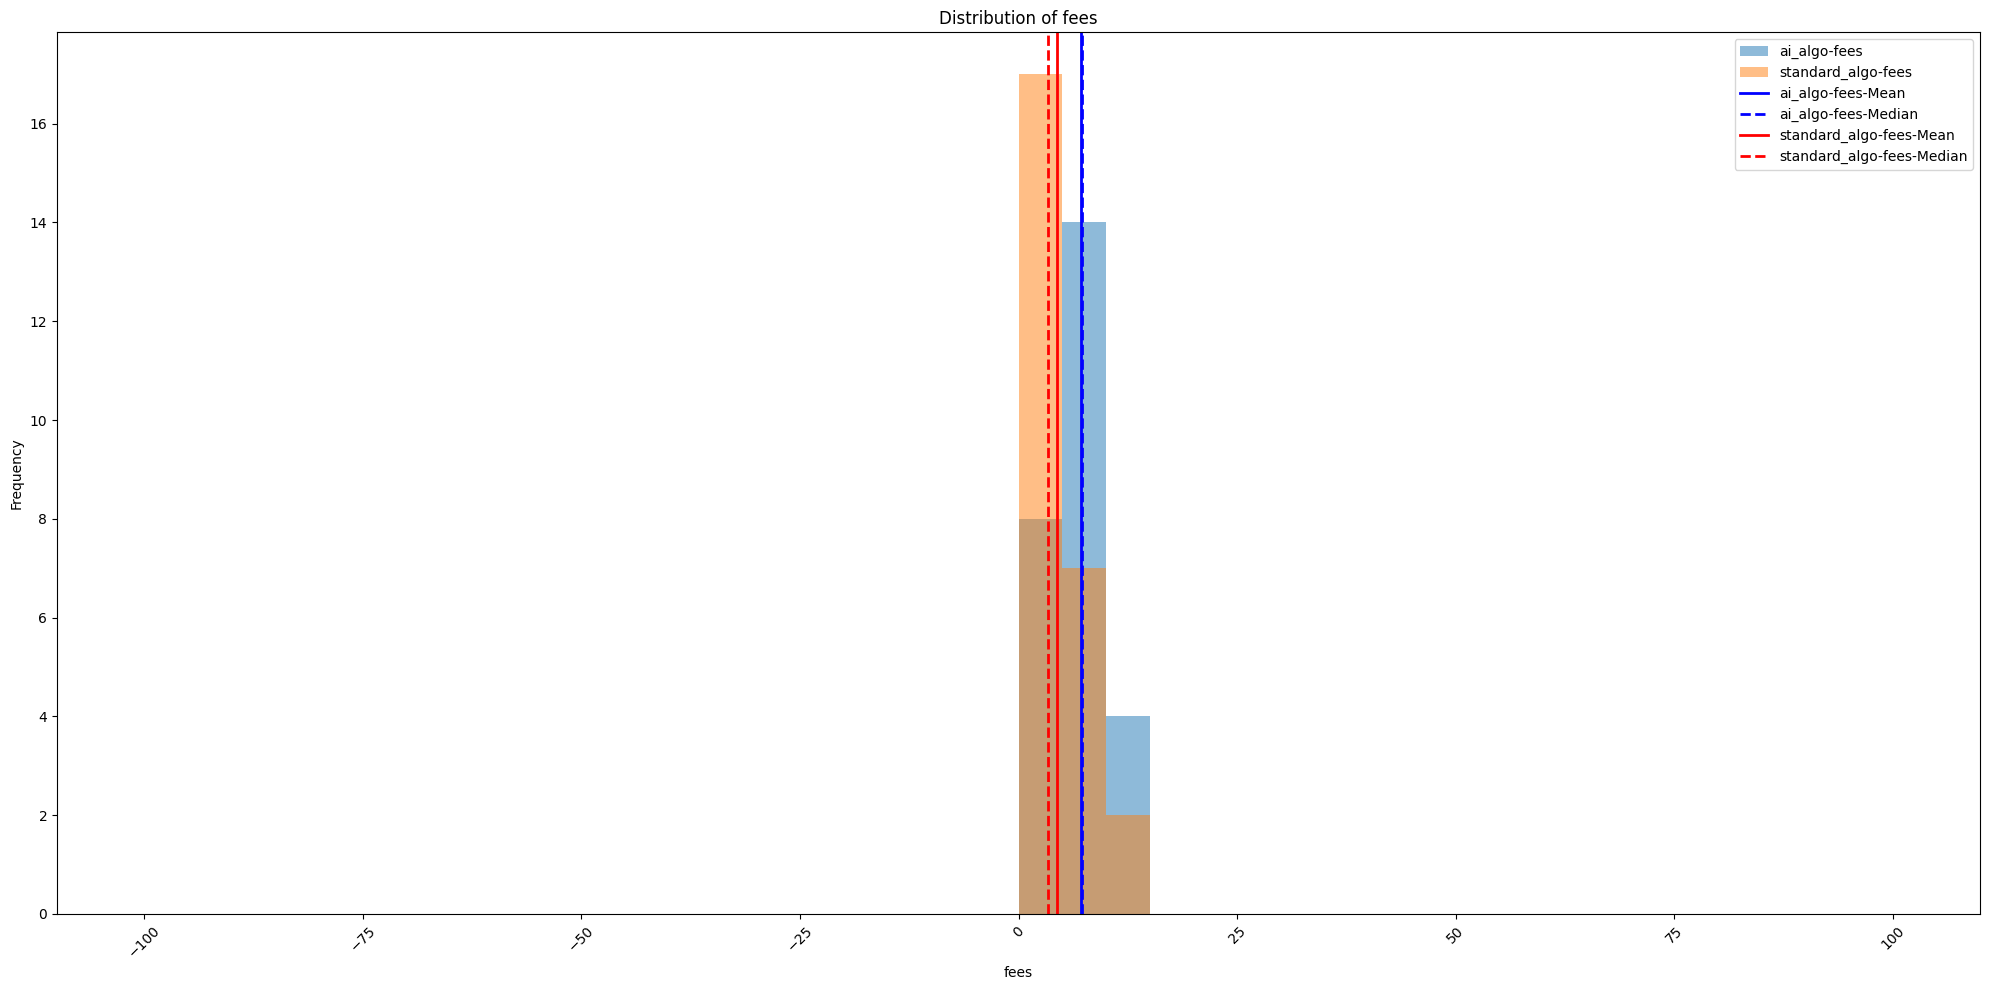

In [55]:
plot_metrics(back_testing_results, 'ai_algo-fees', 'standard_algo-fees','fees')

# Average duration

In [56]:
stats = describe(back_testing_results, 'ai_algo-avg_trade_duration', 'standard_algo-avg_trade_duration')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-avg_trade_duration,26.00000000000000000000,186.97210613042062732347,144.56212721238171070581,87.11764705882353609923,111.01948051948050988358,129.68181818181818698577,182.64999999999997726263,680.00000000000000000000
standard_algo-avg_trade_duration,26.00000000000000000000,257.12113025863021675832,113.47720476744548534498,95.79999999999999715783,144.39488636363637397153,270.75000000000000000000,323.00000000000000000000,487.33333333333331438553


In [57]:
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results,  'ai_algo-avg_trade_duration','standard_algo-avg_trade_duration')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-avg_trade_duration', 'ai_algo-avg_trade_duration')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-avg_trade_duration: 1.2777566718754282e-06
P-value for normality test on standard_algo-avg_trade_duration: 0.04568884738210283
At least one of the groups is not normally distributed.
U-statistic: 176.0
P-value for the Mann-Whitney U test: 0.9985300037240226
Fail to reject the null hypothesis: The median of ai_algo-avg_trade_duration is not significantly greater than the median of standard_algo-avg_trade_duration.
P-value for normality test on standard_algo-avg_trade_duration: 0.04568884738210283
P-value for normality test on ai_algo-avg_trade_duration: 1.2777566718754282e-06
At least one of the groups is not normally distributed.
U-statistic: 500.0
P-value for the Mann-Whitney U test: 0.0015600938500150232
Reject the null hypothesis: The median of standard_algo-avg_trade_duration is significantly greater than the median of ai_algo-avg_trade_duration.


In [58]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-avg_trade_duration')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-avg_trade_duration',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-avg_trade_duration')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-avg_trade_duration',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-avg_trade_duration: 1.2777566718754282e-06
The maximum threshold where the null hypothesis is rejected: 124.24000000002665
P-value for normality test on ai_algo-avg_trade_duration: 1.2777566718754282e-06
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 124.24000000002665.
####################################
P-value for normality test on standard_algo-avg_trade_duration: 0.04568884738210283
The maximum threshold where the null hypothesis is rejected: 218.84999999994594
P-value for normality test on standard_algo-avg_trade_duration: 0.04568884738210283
The series is not normally distributed.
Wilcoxon statistic: 241.0
P-value for the Wilcoxon signed-rank test: 0.04966747760772705
Reject the null hypothesis: The median is significantly greater than 218.84999999994594.


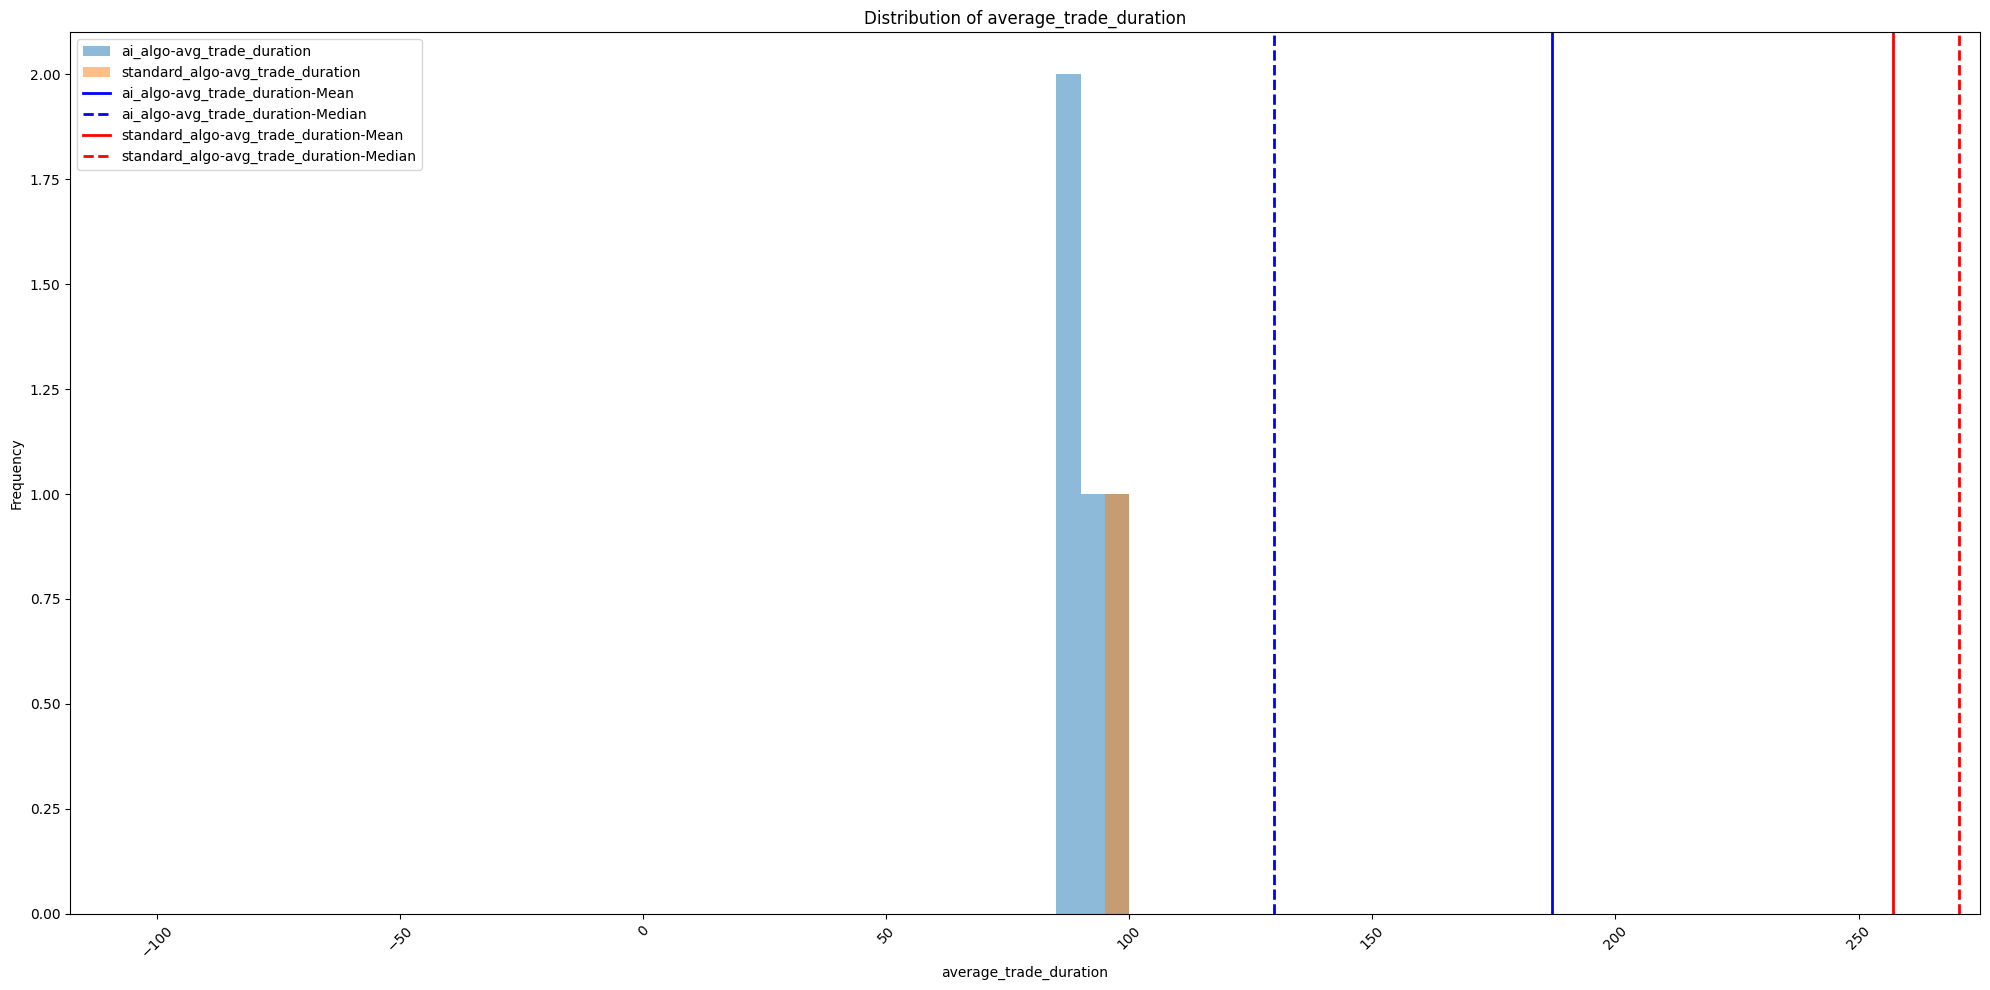

In [59]:
plot_metrics(back_testing_results, 'ai_algo-avg_trade_duration', 'standard_algo-avg_trade_duration', 'average_trade_duration')

# Max drawdown

In [60]:
stats = describe(back_testing_results,'ai_algo-max_drawdown', 'standard_algo-max_drawdown')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-max_drawdown,26.00000000000000000000,0.00014183716931575834,0.00019017115336516006,0.00000000000000000000,0.00000000000000000000,0.00005658469122843401,0.00019116004103237499,0.00068753496180409997
standard_algo-max_drawdown,26.00000000000000000000,0.00000247707247948895,0.00001263064090949783,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00006440388446671275


In [61]:
from scipy import stats
two_samples_result_tmp_df =   two_sample_t_test(back_testing_results,  'ai_algo-max_drawdown','standard_algo-max_drawdown')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-max_drawdown', 'ai_algo-max_drawdown')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-max_drawdown: 7.131545323723308e-05
P-value for normality test on standard_algo-max_drawdown: 6.832292611596165e-11
At least one of the groups is not normally distributed.
U-statistic: 538.0
P-value for the Mann-Whitney U test: 5.964249680725688e-06
Reject the null hypothesis: The median of ai_algo-max_drawdown is significantly greater than the median of standard_algo-max_drawdown.
P-value for normality test on standard_algo-max_drawdown: 6.832292611596165e-11
P-value for normality test on ai_algo-max_drawdown: 7.131545323723308e-05
At least one of the groups is not normally distributed.
U-statistic: 138.0
P-value for the Mann-Whitney U test: 0.9999946083671097
Fail to reject the null hypothesis: The median of standard_algo-max_drawdown is not significantly greater than the median of ai_algo-max_drawdown.


In [62]:
back_testing_results['standard_algo-max_drawdown']

,standard_algo-max_drawdown
0,0.00000000000000000000
1,0.00000000000000000000
2,0.00000000000000000000
3,0.00000000000000000000
4,0.00000000000000000000
5,0.00000000000000000000
6,0.00000000000000000000
7,0.00006440388446671275
8,0.00000000000000000000
9,0.00000000000000000000


In [63]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-max_drawdown',pace =0.000001)
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-max_drawdown',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-max_drawdown',pace =0.000001)
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-max_drawdown',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-max_drawdown: 7.131545323723308e-05
The maximum threshold where the null hypothesis is rejected: 4.399999999999997e-05
P-value for normality test on ai_algo-max_drawdown: 7.131545323723308e-05
The series is not normally distributed.
Wilcoxon statistic: 242.0
P-value for the Wilcoxon signed-rank test: 0.047036513686180115
Reject the null hypothesis: The median is significantly greater than 4.399999999999997e-05.
####################################
P-value for normality test on standard_algo-max_drawdown: 6.832292611596165e-11
The maximum threshold where the null hypothesis is rejected: 0
P-value for normality test on standard_algo-max_drawdown: 6.832292611596165e-11
The series is not normally distributed.
Wilcoxon statistic: 1.0
P-value for the Wilcoxon signed-rank test: 0.15865525393145707
Fail to reject the null hypothesis: The median is not significantly greater than 0.


# Win ratio

In [64]:
stats = describe(back_testing_results, 'ai_algo-win_ratio', 'standard_algo-win_ratio')
stats
all_stats = pd.concat([stats,all_stats], axis = 0)


,count,mean,std,min,25%,50%,75%,max
ai_algo-win_ratio,26.00000000000000000000,0.78691607537761376623,0.18812921293334625150,0.33333333333333331483,0.69423076923076920686,0.83216783216783218879,0.91249999999999997780,1.00000000000000000000
standard_algo-win_ratio,26.00000000000000000000,0.91774267399267395184,0.13081833174001072928,0.66666666666666662966,0.86785714285714288252,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000


In [65]:
from scipy import stats

two_samples_result_tmp_df =   two_sample_t_test(back_testing_results, 'ai_algo-win_ratio','standard_algo-win_ratio')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)
two_samples_result_tmp_df =  two_sample_t_test(back_testing_results,'standard_algo-win_ratio', 'ai_algo-win_ratio')
two_samples_result_df = pd.concat([two_samples_result_tmp_df,two_samples_result_df], axis = 0)

P-value for normality test on ai_algo-win_ratio: 0.02638009775980766
P-value for normality test on standard_algo-win_ratio: 1.0253143576575172e-06
At least one of the groups is not normally distributed.
U-statistic: 187.5
P-value for the Mann-Whitney U test: 0.9980922497689075
Fail to reject the null hypothesis: The median of ai_algo-win_ratio is not significantly greater than the median of standard_algo-win_ratio.
P-value for normality test on standard_algo-win_ratio: 1.0253143576575172e-06
P-value for normality test on ai_algo-win_ratio: 0.02638009775980766
At least one of the groups is not normally distributed.
U-statistic: 488.5
P-value for the Mann-Whitney U test: 0.002027400859446355
Reject the null hypothesis: The median of standard_algo-win_ratio is significantly greater than the median of ai_algo-win_ratio.


In [66]:
threshold = find_max_rejection_threshold(back_testing_results, 'ai_algo-win_ratio')
one_sample_result_tmp_df = t_test(back_testing_results,'ai_algo-win_ratio',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)
print("####################################")
threshold = find_max_rejection_threshold(back_testing_results, 'standard_algo-win_ratio')
one_sample_result_tmp_df = t_test(back_testing_results,'standard_algo-win_ratio',threshold)
one_sample_result_df = pd.concat([one_sample_result_tmp_df,one_sample_result_df], axis = 0)

P-value for normality test on ai_algo-win_ratio: 0.02638009775980766
The maximum threshold where the null hypothesis is rejected: 0.7300000000000004
P-value for normality test on ai_algo-win_ratio: 0.02638009775980766
The series is not normally distributed.
Wilcoxon statistic: 244.0
P-value for the Wilcoxon signed-rank test: 0.04209865629673004
Reject the null hypothesis: The median is significantly greater than 0.7300000000000004.
####################################
P-value for normality test on standard_algo-win_ratio: 1.0253143576575172e-06
The maximum threshold where the null hypothesis is rejected: 0.8700000000000006
P-value for normality test on standard_algo-win_ratio: 1.0253143576575172e-06
The series is not normally distributed.
Wilcoxon statistic: 243.0
P-value for the Wilcoxon signed-rank test: 0.04451450705528259
Reject the null hypothesis: The median is significantly greater than 0.8700000000000006.


# aggregated output

In [67]:
two_samples_result_df

,col1,col2,normality_test_p_value_col1,normality_test_p_value_col2,is_normal,p_value_equal_variance_levene_test,t_stat,p_value_ttest,u_stat,p_value_mannwhitney,decision
0,standard_algo-win_ratio,ai_algo-win_ratio,0.00000102531435765752,0.02638009775980765942,no,None,None,None,488.50000000000000000000,0.00202740085944635518,Reject H0
0,ai_algo-win_ratio,standard_algo-win_ratio,0.02638009775980765942,0.00000102531435765752,no,None,None,None,187.50000000000000000000,0.99809224976890753567,Fail to reject H0
0,standard_algo-max_drawdown,ai_algo-max_drawdown,0.00000000006832292612,0.00007131545323723308,no,None,None,None,138.00000000000000000000,0.99999460836710973854,Fail to reject H0
0,ai_algo-max_drawdown,standard_algo-max_drawdown,0.00007131545323723308,0.00000000006832292612,no,None,None,None,538.00000000000000000000,0.00000596424968072569,Reject H0
0,standard_algo-avg_trade_duration,ai_algo-avg_trade_duration,0.04568884738210283319,0.00000127775667187543,no,None,None,None,500.00000000000000000000,0.00156009385001502324,Reject H0
0,ai_algo-avg_trade_duration,standard_algo-avg_trade_duration,0.00000127775667187543,0.04568884738210283319,no,None,None,None,176.00000000000000000000,0.99853000372402256346,Fail to reject H0
0,standard_algo-fees,ai_algo-fees,0.00297496925134602824,0.33828680541472305743,no,None,None,None,187.00000000000000000000,0.99721973778544326095,Fail to reject H0
0,ai_algo-fees,standard_algo-fees,0.33828680541472305743,0.00297496925134602824,no,None,None,None,489.00000000000000000000,0.00294062927092059992,Reject H0
0,standard_algo-num_trades,ai_algo-num_trades,0.00035807047427074360,0.35368653598718607922,no,None,None,None,184.00000000000000000000,0.99779919883315182361,Fail to reject H0
0,ai_algo-num_trades,standard_algo-num_trades,0.35368653598718607922,0.00035807047427074360,no,None,None,None,492.00000000000000000000,0.00233166116881912194,Reject H0


In [68]:
two_samples_result_df['metric'] = two_samples_result_df.apply(lambda x : x['col1'].split('-')[1], axis = 1)
two_samples_result_df['algo_type_col1'] = two_samples_result_df.apply(lambda x : x['col1'].split('-')[0], axis = 1)
two_samples_result_df['algo_type_col2'] = two_samples_result_df.apply(lambda x : x['col2'].split('-')[0], axis = 1)
two_samples_result_df['H0'] = two_samples_result_df.apply(lambda x : f"{x['algo_type_col2']}>={x['algo_type_col1']}", axis = 1)
two_samples_result_df['Ha'] = two_samples_result_df.apply(lambda x : f"{x['algo_type_col1']}>{x['algo_type_col2']}", axis = 1)
columns = [ 'metric',  'H0', 'Ha','col1', 'col2','normality_test_p_value_col1',
       'normality_test_p_value_col2', 'is_normal',
       'p_value_equal_variance_levene_test', 't_stat', 'p_value_ttest',
       'u_stat', 'p_value_mannwhitney', 'decision', ]
two_samples_result_df = two_samples_result_df[columns].sort_values(by = ['metric','H0'], ascending = [True,True])

In [69]:
one_sample_result_df['metric'] = one_sample_result_df.apply(lambda x : x['col'].split('-')[1], axis = 1)
one_sample_result_df['algo_type_col'] = one_sample_result_df.apply(lambda x : x['col'].split('-')[0], axis = 1)
one_sample_result_df['H0'] = one_sample_result_df.apply(lambda x : f"{x['algo_type_col']}<={x['threshold']}", axis = 1)
one_sample_result_df['Ha'] = one_sample_result_df.apply(lambda x : f"{x['algo_type_col']}>{x['threshold']}", axis = 1)
columns = [ 'metric', 'threshold', 'H0', 'Ha', 'normality_test_p_value_col', 'is_normal','t_stat',
       'p_value_ttest', 'wilcoxon_stat', 'p_value_wilcoxon', 'decision']
one_sample_result_df = one_sample_result_df[columns].sort_values(by = ['metric','H0'], ascending = [True,True])

In [70]:
all_stats = all_stats.reset_index()
all_stats['metric'] = all_stats.apply(lambda x : x['index'].split('-')[1], axis = 1)
all_stats['algo_type_col'] = all_stats.apply(lambda x : x['index'].split('-')[0], axis = 1)
columns = ['metric', 'algo_type_col', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
all_stats = all_stats[columns]

In [71]:
all_stats.to_csv("EXPLORATIVE_DATA_ANALYSIS/all_stats.csv", index = False)
two_samples_result_df.to_csv("EXPLORATIVE_DATA_ANALYSIS/two_samples_result.csv", index = False)
one_sample_result_df.to_csv("EXPLORATIVE_DATA_ANALYSIS/one_sample_result.csv", index = False)